In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
apple = pd.read_csv("Apple Stock.csv")
amazon = pd.read_csv("Amazon Stock.csv")

In [3]:
apple.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1/3/2000,0.806567,0.865209,0.782053,0.860883,535796800,0.0,0
1,1/4/2000,0.832523,0.850789,0.778208,0.788302,512377600,0.0,0
2,1/5/2000,0.797915,0.850308,0.792147,0.799837,778321600,0.0,0
3,1/6/2000,0.816181,0.822910,0.730621,0.730621,767972800,0.0,0
4,1/7/2000,0.742157,0.776765,0.734466,0.765229,460734400,0.0,0


In [4]:
amazon.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1/3/2000,81.5000,89.5625,79.046875,89.3750,16117600,0,0
1,1/4/2000,85.3750,91.5000,81.750000,81.9375,17487400,0,0
2,1/5/2000,70.5000,75.1250,68.000000,69.7500,38457400,0,0
3,1/6/2000,71.3125,72.6875,64.000000,65.5625,18752000,0,0
4,1/7/2000,67.0000,70.5000,66.187500,69.5625,10505400,0,0


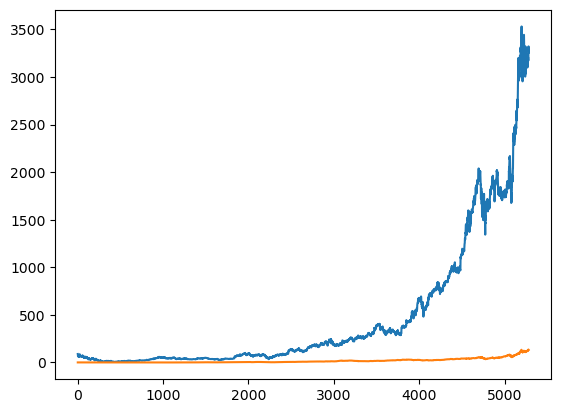

In [5]:
plt.plot(amazon.Close)
plt.plot(apple.Close)
plt.show()

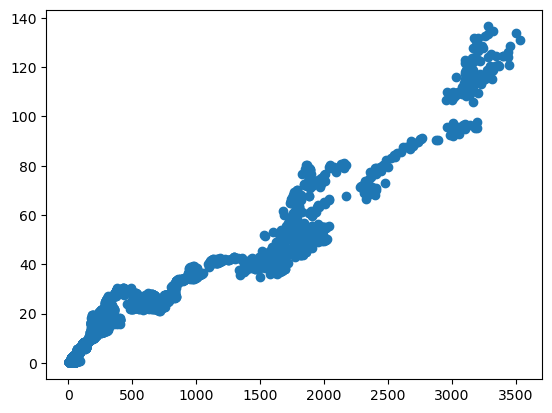

In [6]:
plt.scatter(amazon.Close, apple.Close)

### Anatomy of Matplotlib Figure
* Title
* Legend
* xlabel
* xticks
* ylabel 
* yticks 
* grids 
* markers 

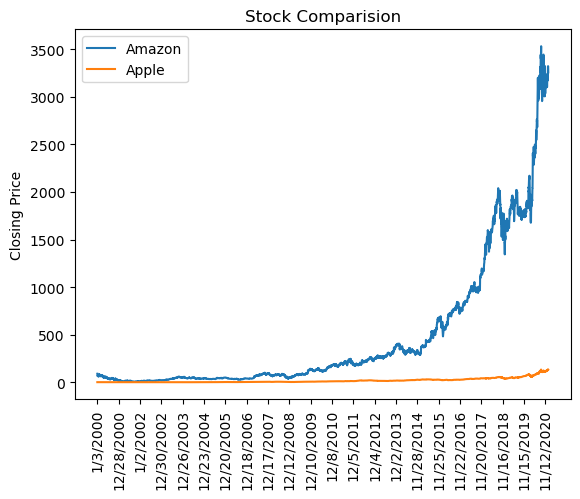

In [7]:
# X ticks with rotation, legend, title, x and y labels
plt.plot(amazon.Close, label = "Amazon")
plt.plot(apple.Close, label = "Apple")
plt.title("Stock Comparision")
plt.ylabel("Closing Price")
plt.legend()
plt.xticks(np.arange(0,amazon.shape[0],250), amazon.Date[:amazon.shape[0]:250], rotation = 90)
plt.show()

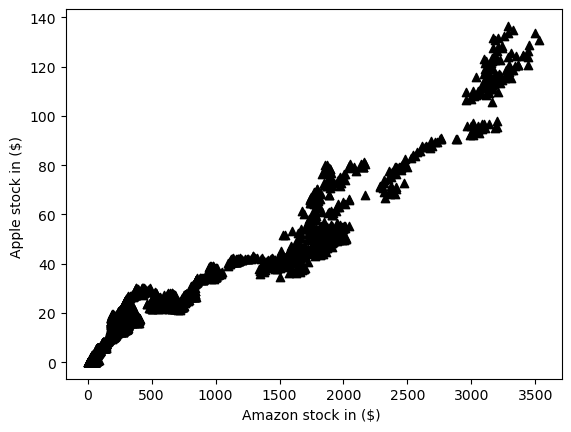

In [8]:
## Marker and Color
# Markers: https://matplotlib.org/stable/api/markers_api.html
# Colors: https://matplotlib.org/stable/gallery/color/named_colors.html
plt.scatter(amazon.Close, apple.Close, marker = '^', color = 'k')
plt.xlabel("Amazon stock in ($) ")
plt.ylabel("Apple stock in ($) ")
plt.show()

## Subplots

In [9]:
adult_df = pd.read_csv("../NumpyPandasReview/adult.csv")
adult_df.shape

(32561, 15)

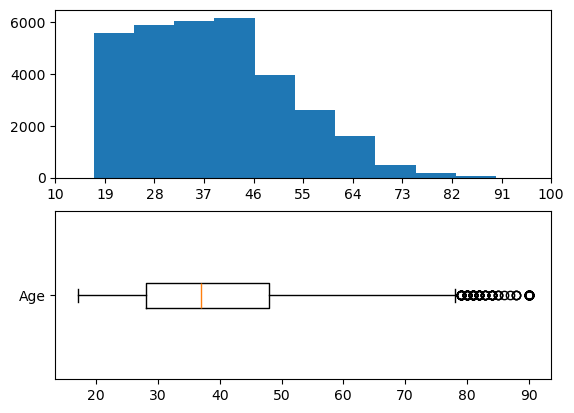

In [10]:
plt.subplot(2,1,1)
plt.hist(adult_df.age)
plt.xticks(np.linspace(10,100,11))
plt.subplot(2,1,2)
plt.boxplot(adult_df.age, vert = False)
plt.yticks([1],["Age"])
plt.show()

In [11]:
#resize
plt.figure(figsize=(12,12))

#Saving
# dots per inch (DPI)
plt.savefig('visual.png',dpi=600)

<Figure size 1200x1200 with 0 Axes>

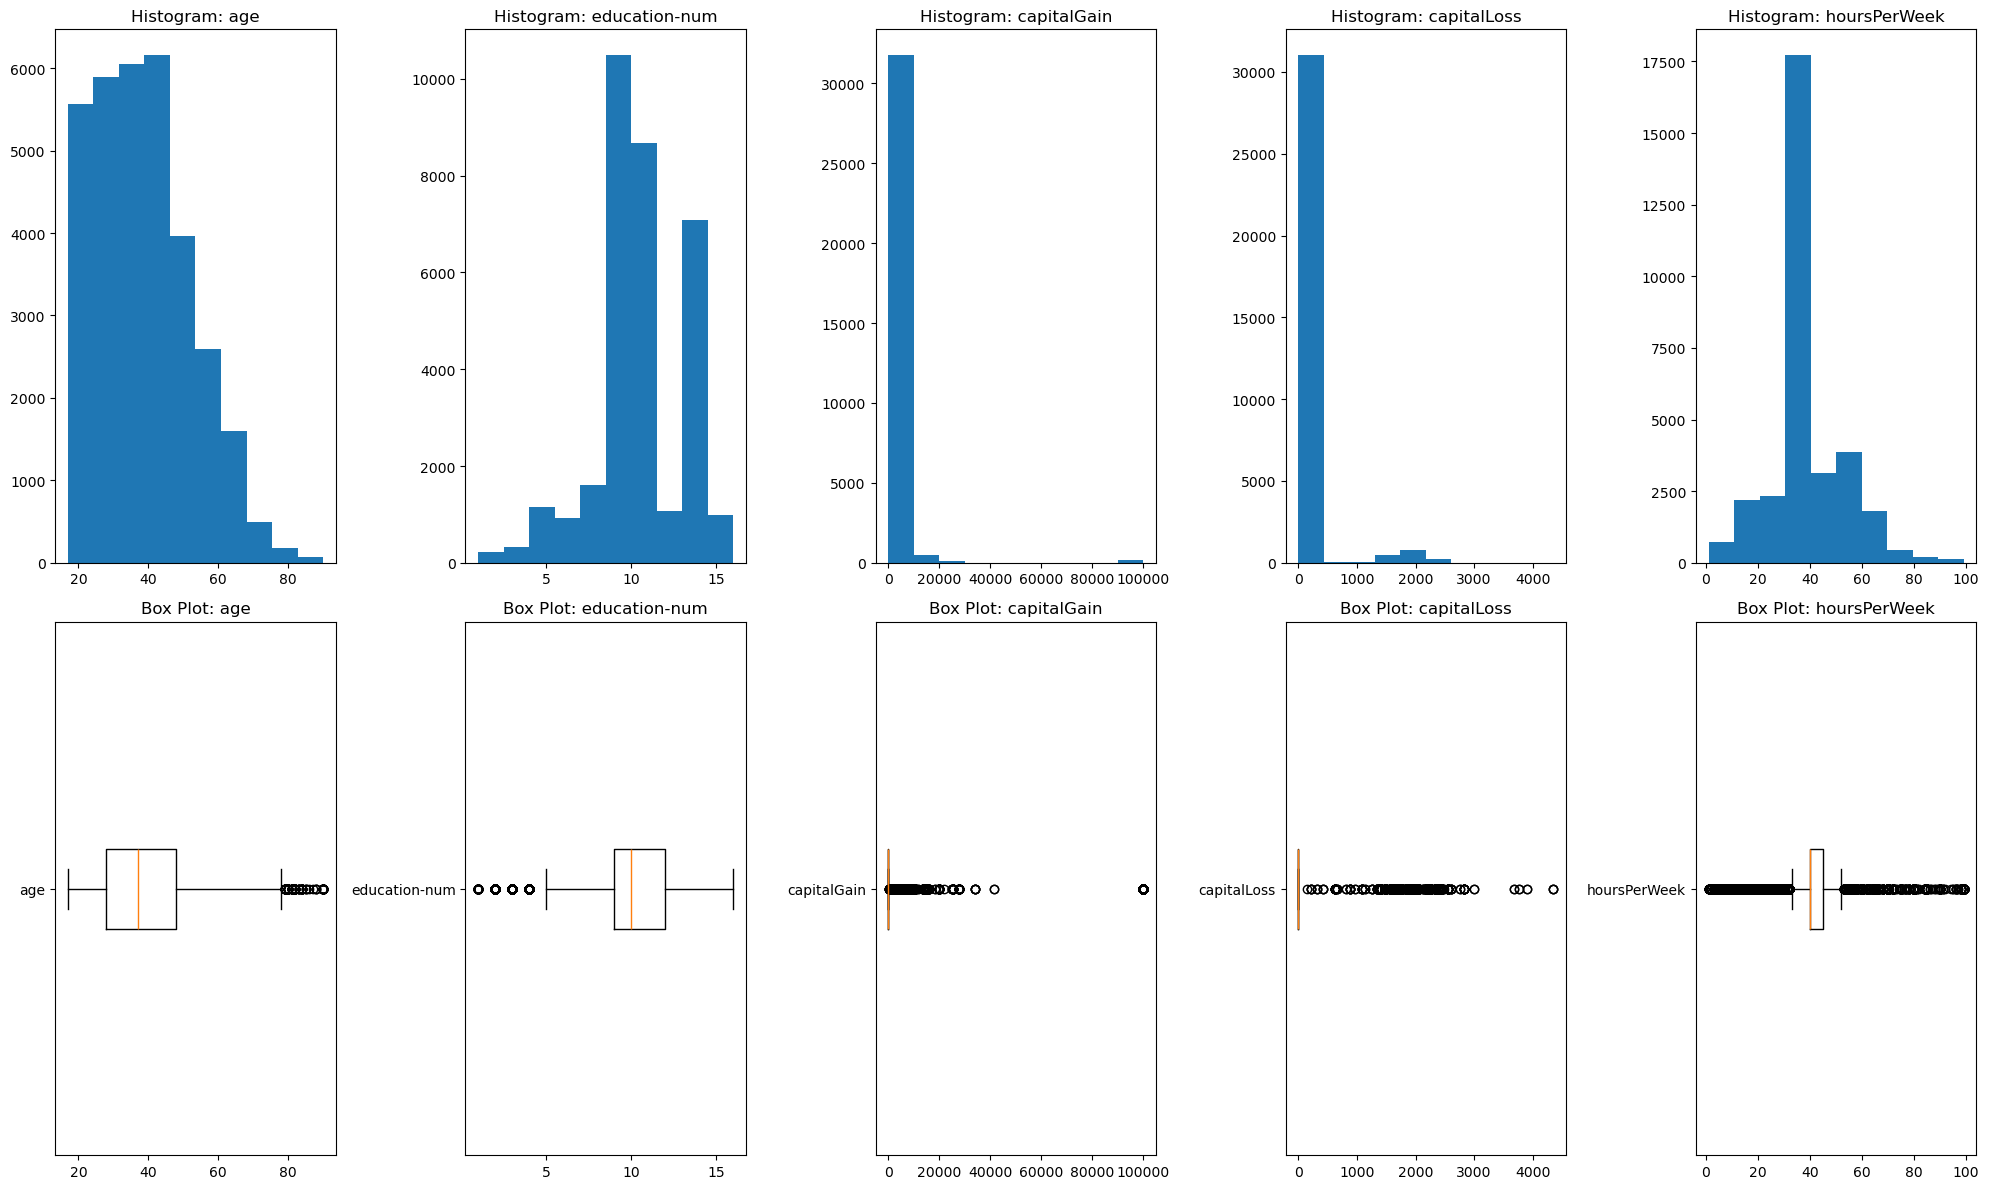

In [12]:
plt.figure(figsize=(20,12))

numeric_cols = ["age","education-num","capitalGain","capitalLoss","hoursPerWeek"]

for i,col in enumerate(numeric_cols):
    plt.subplot(2,5,i+1)
    plt.hist(adult_df[col])
    # plt.xticks(np.linspace(10,100,11))
    plt.title(f"Histogram: {col}")
    plt.subplot(2,5,i+5+1)
    plt.boxplot(adult_df[col], vert = False)
    plt.yticks([1],[col])
    plt.title(f"Box Plot: {col}")
plt.tight_layout()
plt.savefig("subplot.png",dpi = 600)

In [13]:
# Use adult.csv and Boolean masking to answer the following questions:
# a. Calculate the mean and median of education-num for every race in the data.

race_list = adult_df.race.unique()
t1 = time.time()
adult_df.groupby("race")["education-num"].mean()
print(f"Groupby time : {time.time()-t1}")

Groupby time : 0.0


In [14]:
# Boolean Mask
result = {}
t1 = time.time()
for race in race_list:
    BM = adult_df["race"] == race
    result[race] = np.mean(adult_df[BM]["education-num"])
# print(result)
print(f"Boolean Mask time : {time.time()-t1}")

Boolean Mask time : 0.037598609924316406


In [15]:
t1 = time.time()
adult_df.groupby("race")["education-num"].median()
print(f"Groupby time : {time.time()-t1}")

Groupby time : 0.005375862121582031


In [16]:
result = {}
t1 = time.time()
for race in race_list:
    BM = adult_df["race"] == race
    result[race] = np.median(adult_df[BM]["education-num"])
# print(result)
print(f"Boolean Mask time : {time.time()-t1}")

Boolean Mask time : 0.02804088592529297


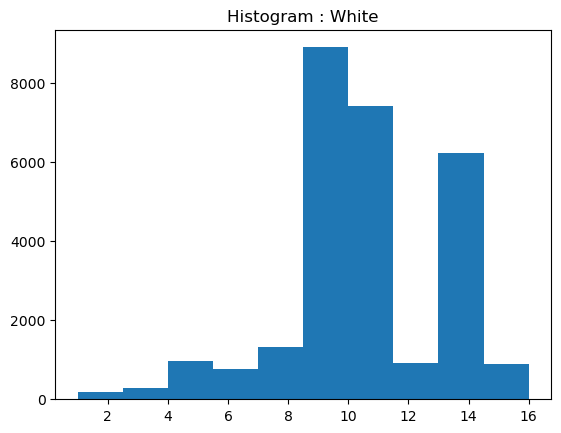

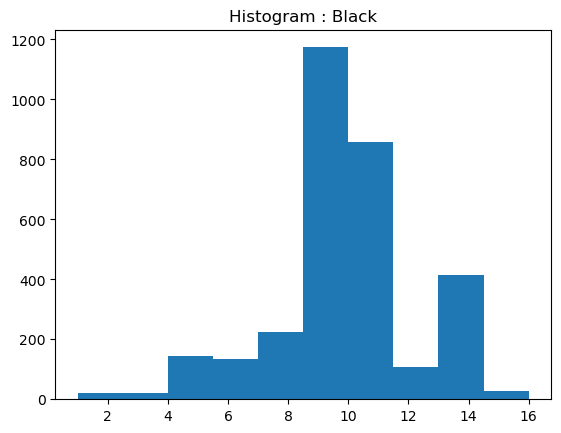

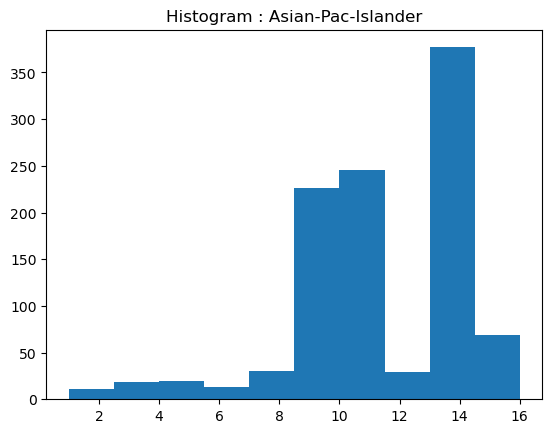

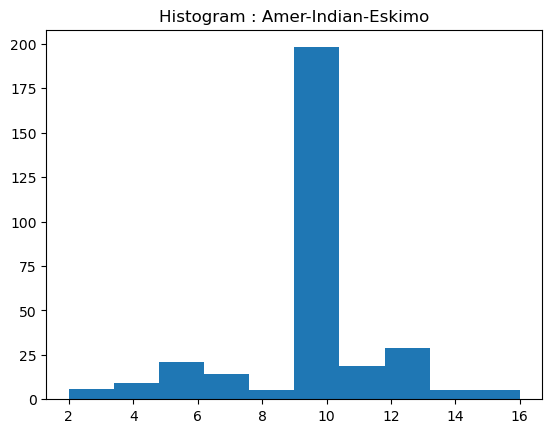

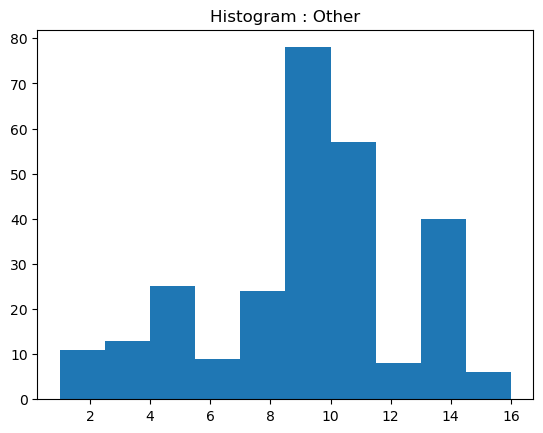

In [17]:
# b. Draw one histogram of education-num that includes the data for each race in the data.
for race in race_list:
    BM = adult_df["race"] == race
    plt.hist(adult_df[BM]["education-num"])
    plt.title(f"Histogram : {race}")
    plt.show()

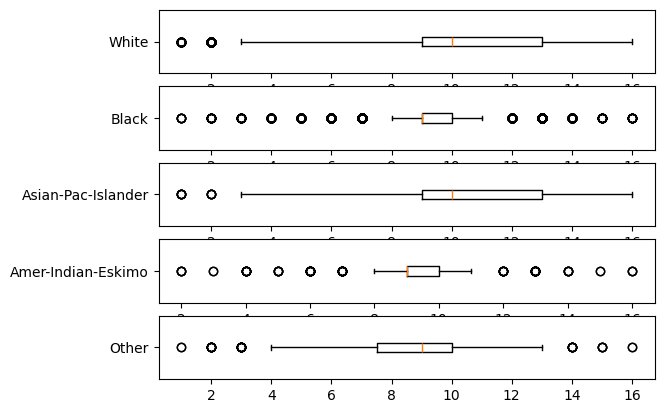

In [18]:
# c. Draw a comparative boxplot that compares the education-num for each race.
for i,race in enumerate(race_list):
    BM = adult_df["race"] == race
    plt.subplot(5,1,i+1)
    plt.boxplot(adult_df[BM]["education-num"], vert = False)
    plt.yticks([1],[race])
plt.show()


<Axes: ylabel='income'>

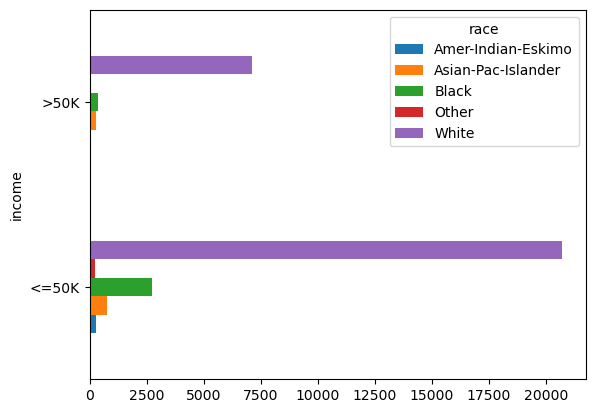

In [19]:
# d. Create a subplot that puts the visual from b) on top of the one from c).
adult_df.groupby(['income','race']).size().unstack().plot.barh()

In [21]:
adult_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capitalGain', 'capitalLoss', 'hoursPerWeek', 'nativeCountry',
       'income'],
      dtype='object')

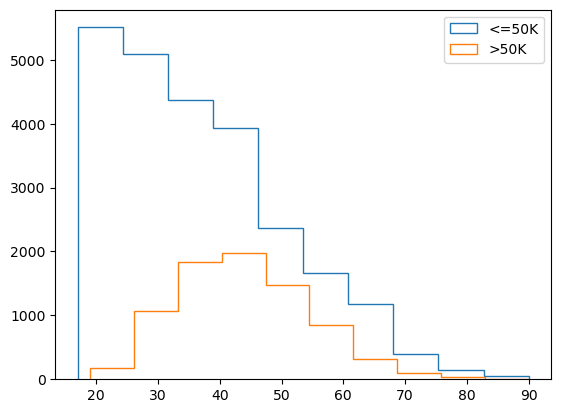

In [22]:
possibilities = adult_df['income'].unique()
for pos in possibilities:
    BM = pos == adult_df["income"]
    plt.hist(adult_df[BM]['age'], label= pos, histtype='step')
plt.legend()
plt.show()

In [23]:
#relationship between categorical and caregorial attribute
contingency_table = pd.crosstab(adult_df.sex,adult_df.income)
contingency_table

income,<=50K,>50K
sex,,
Female,9592,1179
Male,15128,6662


In [24]:
#Example of a using contingency table to relationship between two categorical 
# (binary) attributes
probality_table = contingency_table/contingency_table.sum()
probality_table

income,<=50K,>50K
sex,,
Female,0.388026,0.150363
Male,0.611974,0.849637


<Axes: xlabel='income', ylabel='sex'>

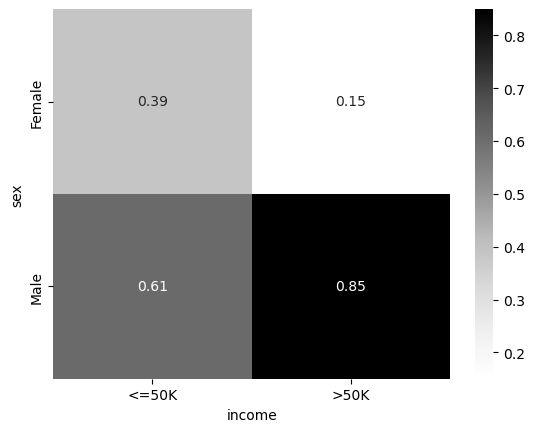

In [25]:
import seaborn as sns
sns.heatmap(probality_table, annot = True, center = 0.5, cmap="Greys")

<Axes: xlabel='occupation', ylabel='race'>

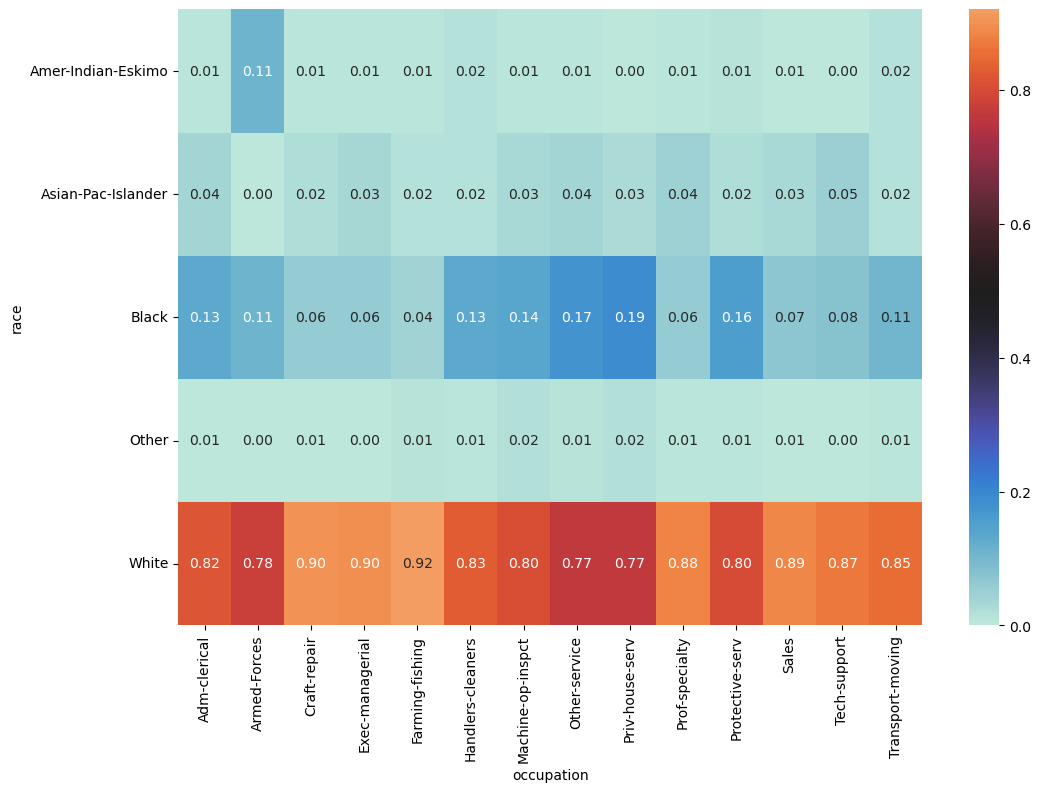

In [31]:
#Example of a using contingency table to relationship between two categorical 
# (non-binary) attributes
contingency_table2 = pd.crosstab(adult_df.race, adult_df.occupation)
prob_table  = contingency_table2/contingency_table2.sum()
plt.figure(figsize=(12,8))
sns.heatmap(prob_table, annot = True, center = 0.5, fmt = "0.2f")

<Axes: xlabel='race', ylabel='age'>

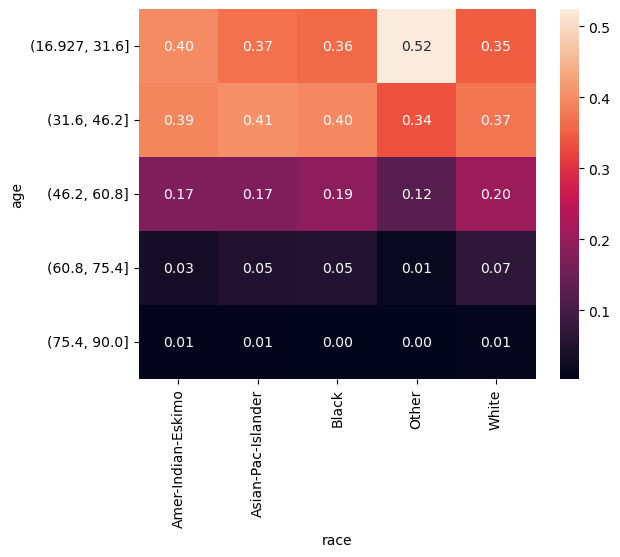

In [33]:
# Visualizing the relationship between a numerical attribute and a categorical attribute
age_discretized = pd.cut(adult_df.age,bins = 5)
contingency_table3 = pd.crosstab(age_discretized, adult_df.race)
prob_table = contingency_table3/contingency_table3.sum()
sns.heatmap(prob_table,annot = True, fmt = "0.2f")